In [1]:
import pandas                as     pd
import seaborn               as     sns
from   sklearn.decomposition import PCA
from   sklearn.mixture       import GaussianMixture
from   sklearn.datasets      import make_moons
import matplotlib.pyplot     as     plt
from   sklearn.cluster       import KMeans, DBSCAN


# **Classer par GMM, KMeans et DBSCAN**

## **Mélange Gaussien avec les données IRIS**

In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### **Supprimer les étiquettes et réduire le dataset (en tableau 2D) par le PCA**

In [3]:
pca      = PCA(n_components=2)
X        = df.drop(columns='species')
features = pca.fit_transform(X)

### **Convertir le tableau NumPy en Dataframe et tracer le nuage de points**

<Axes: xlabel='0', ylabel='1'>

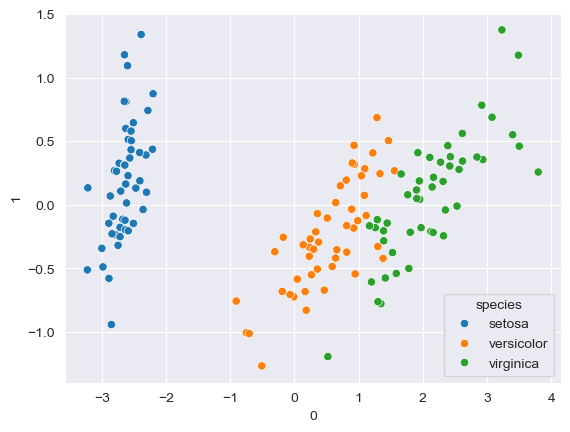

In [4]:
features_df = pd.DataFrame(features , columns = ['0' , '1'])
sns.scatterplot(features_df , x = features_df['0'] , y=features_df['1'] , hue = df.species)

Ce sont les clusters originaux.

# **Créer un estimateur de mélange gaussien**
Va t-il créer d'autres clusters ?

In [5]:
gmm = GaussianMixture(n_components=3)
gmm.fit(features_df)
gmm_cluster = gmm.predict(features_df)

C:\Users\miklg\.conda\envs\workspace\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### **Passer la variavle '`gmm_cluster`' au paramètre '`hue`'**

<Axes: xlabel='0', ylabel='1'>

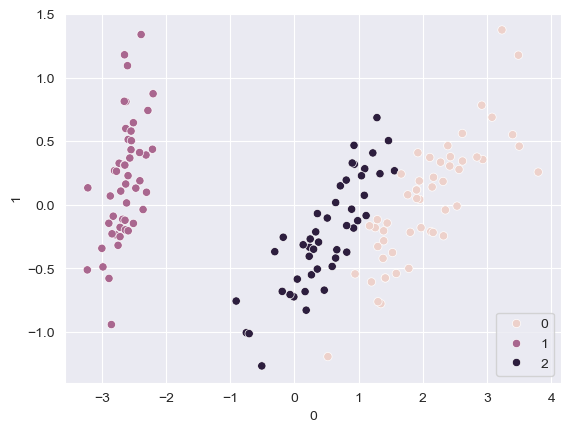

In [6]:
sns.scatterplot(features_df, x=features_df['0'], y=features_df['1'], hue=gmm_cluster)

La différence n'est pas si importante, Le modèle de mélange gaussion fonctionne fien.

Ici, le mélange gaussien génère les clusters.
Et peut aussi détecte les anomalies, estimer la densité, extraire les features et générer des données.

## **Avant d'utiliser DBSCAN, il faut créer les point de données en fer à cheval**

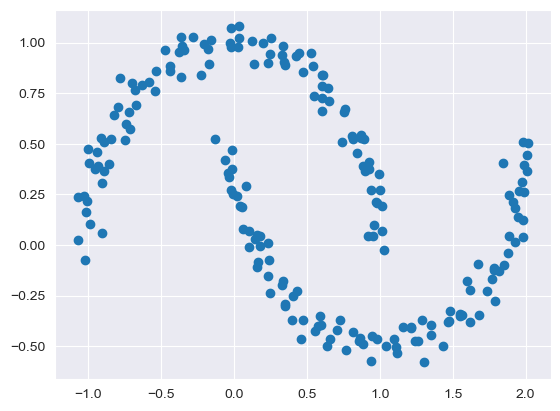

In [7]:
Xmoon, ymoon = make_moons(200, noise=0.05, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1])

### **Les regrouper avec KMEANS**

C:\Users\miklg\.conda\envs\workspace\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


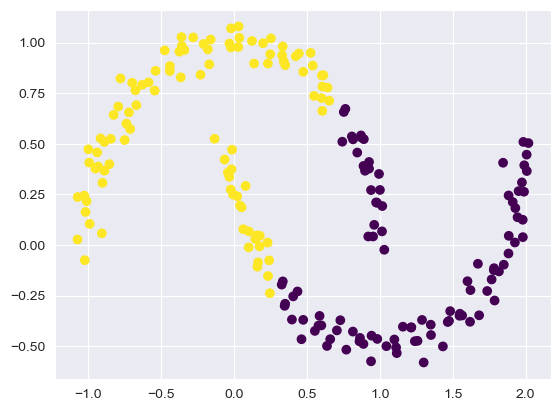

In [8]:
kmeans = KMeans(n_clusters=2, random_state=101)
kmeans.fit(Xmoon)
kmeans_clusters = kmeans.predict(Xmoon)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1], c=kmeans_clusters, cmap='viridis')

### **Que fait DBSCAN ?**

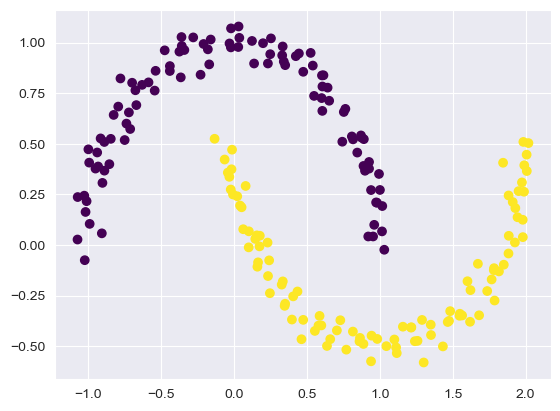

In [9]:
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(Xmoon)
dbscan_clusters = dbscan.labels_
plt.scatter(Xmoon[:, 0], Xmoon[:, 1], c=dbscan_clusters, cmap='viridis')